## 6.5 Machine Learning Part 2

#### This script contains the following:
1. Importing libraries, data, and renaming columns
2. The elbow technique
3. k-means clustering

#### 1. Importing libraries, data, and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import KMeans # Import the k-means algorithm from scikit-learn
import pylab as pl 

In [2]:
# This option ensures the graphs created are displayed in notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Import data
df = pd.read_csv(r'C:\Users\heidi\OneDrive\CareerFoundry\Achievement6 Sourcing Open Data\Exercise 6.5\Answers 6.5\ufc-master-clean1.csv', index_col = False)

In [4]:
path = (r'C:\Users\heidi\OneDrive\CareerFoundry\Achievement6 Sourcing Open Data\Exercise 6.5')

In [5]:
df.shape

(4515, 31)

In [6]:
df.head()

,R_fighter,B_fighter,R_odds,B_odds,date,City,State/Province,country,Winner,title_bout,...,R_age,B_age,height_dif,reach_dif,age_dif,Finish2,finish,finish_details,finish_round,finish_round_time
0,Anthony Pettis,Alex Morono,-210,175,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,33,30,2.54,0.00,-3,U-DEC,U-DEC,NaN,3,5:00
1,Christos Giagos,Carlton Minus,-345,285,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,30,27,0.00,10.16,-3,U-DEC,U-DEC,NaN,3,5:00
2,Deron Winn,Antonio Arroyo,160,-185,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,31,31,22.86,7.62,0,U-DEC,U-DEC,NaN,3,5:00
3,Gillian Robertson,Taila Santos,-145,125,12/19/2020,Las Vegas,Nevada,USA,Blue,False,...,27,25,-2.54,-12.70,-2,U-DEC,U-DEC,NaN,3,5:00
4,Jimmy Flick,Cody Durden,-157,137,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,30,29,0.00,-2.54,-1,SUB,SUB,Triangle choke,1,3:18


In [7]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'City',
       'State/Province', 'country', 'Winner', 'title_bout', 'weight_class',
       'gender', 'no_of_rounds', 'B_Stance', 'B_Height_cms', 'B_Reach_cms',
       'B_Weight_lbs', 'R_Stance', 'R_Height_cms', 'R_Reach_cms',
       'R_Weight_lbs', 'R_age', 'B_age', 'height_dif', 'reach_dif', 'age_dif',
       'Finish2', 'finish', 'finish_details', 'finish_round',
       'finish_round_time'],
      dtype='object')

In [8]:
# Add calculated column indicating 'averages'
df["average_height"] = (df["B_Height_cms"] + df["R_Height_cms"])/2
df["average_age"] = (df['R_age'] +  df['B_age'])/2
df["average_reach"] = (df['B_Reach_cms'] +  df['R_Reach_cms'])/2
df["average_weight"] = (df['B_Weight_lbs'] +  df['R_Weight_lbs'])/2
df.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'City',
       'State/Province', 'country', 'Winner', 'title_bout', 'weight_class',
       'gender', 'no_of_rounds', 'B_Stance', 'B_Height_cms', 'B_Reach_cms',
       'B_Weight_lbs', 'R_Stance', 'R_Height_cms', 'R_Reach_cms',
       'R_Weight_lbs', 'R_age', 'B_age', 'height_dif', 'reach_dif', 'age_dif',
       'Finish2', 'finish', 'finish_details', 'finish_round',
       'finish_round_time', 'average_height', 'average_age', 'average_reach',
       'average_weight'],
      dtype='object')

In [9]:
sub = df[['average_height', 'average_age', 'average_reach', 'average_weight', 'finish_round']]

In [10]:
sub.columns

Index(['average_height', 'average_age', 'average_reach', 'average_weight',
       'finish_round'],
      dtype='object')

#### 2. The elbow technique

In [11]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10)
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [12]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

In [13]:
score

[-6014372.461106768,
 -2332910.0263284617,
 -1119047.1515948917,
 -645672.7710988082,
 -439365.8972634264,
 -364023.4918857082,
 -301974.40782239294,
 -269977.1290782979,
 -248416.9295682247]

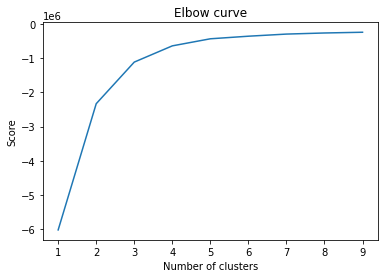

In [14]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow curve')
pl.show()

#### Choosing the number of clusters: There is a large jump from number 2 to 3 after which the curver starightens out. Thi means that the optimal number for the cluster is three.

#### 3. k-means clustering

In [15]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [16]:
# Fit the k-means object to the data.
kmeans.fit(sub)

C:\Users\heidi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [17]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\heidi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\heidi\AppData\Local\Temp/ipykernel_31228/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [18]:
sub.head()

,average_height,average_age,average_reach,average_weight,finish_round,clusters
0,179.07,31.5,182.88,162.5,3,0
1,177.80,28.5,185.42,162.5,3,0
2,179.07,31.0,181.61,185.0,3,0
3,166.37,26.0,166.37,125.0,3,1
4,170.18,29.5,171.45,125.0,1,1


In [19]:
sub['clusters'].value_counts()

1    2350
0    1800
2     365
Name: clusters, dtype: int64

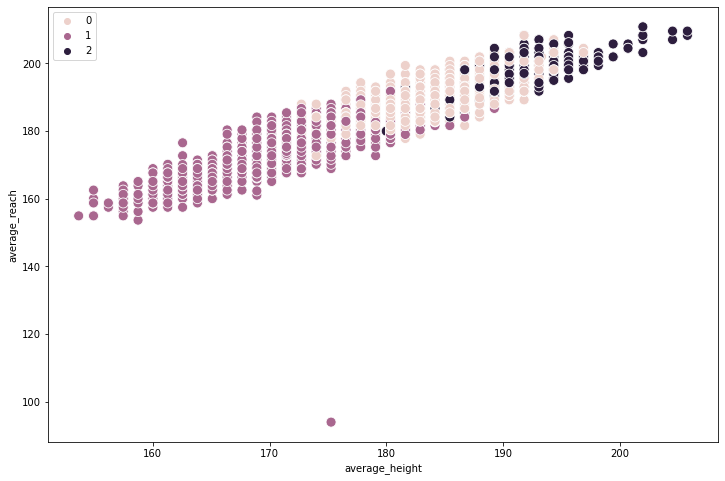

In [20]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.
plt.figure(figsize=(12,8))
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax = sns.scatterplot(x = sub['average_height'], y = sub['average_reach'], hue = kmeans.labels_, s = 100)

# Removes the grid from the background.
ax.grid(False)
plt.xlabel('average_height')
plt.ylabel('average_reach')
plt.show()

Conclusion: Taller MMA fighters generally have a longer reach.
There are more fighters in the weight group 1, than in 0 and 2.

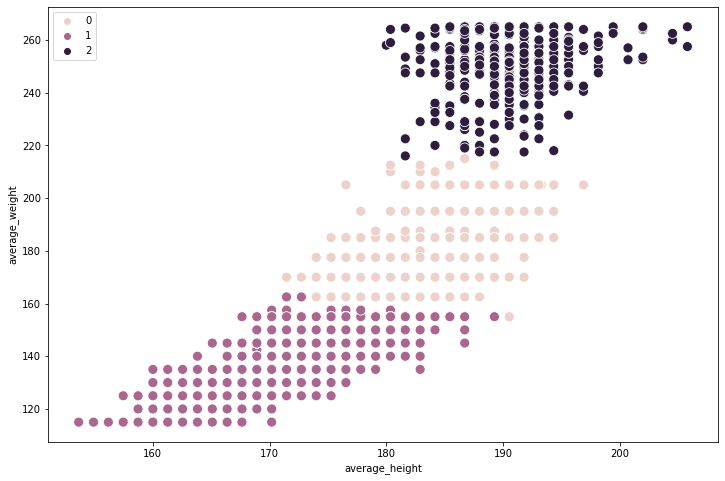

In [21]:
# Plot the clusters for the 'average_height' and 'average_weight' variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = sub['average_height'], y = sub['average_weight'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('average_height')
plt.ylabel('average_weight')
plt.show()

Conclusion: The MMA fighters' weight is proportionally heavier according to weight. There are some outliers around 180 - 185lbs where the weight stays unexpectedly lower. This is because the Mens Middleweight starts at 170lbs and Light Heavyweight at 185lbs.

In [22]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'black'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\heidi\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\heidi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
sub.groupby('cluster').agg({'average_height':['mean', 'median'],
                           'average_reach':['mean', 'median'],
                           'average_age':['mean', 'median'],
                             'finish_round':['mean', 'median'],
                           'average_weight':['mean', 'median']})

average_height         average_reach         average_age         \
                  mean  median          mean  median        mean median   
cluster                                                                   
black       190.519890  190.50    196.614890  196.85   32.047945   32.0   
pink        183.572972  184.15    188.959919  189.23   30.233056   30.0   
purple      172.041226  172.72    175.489119  176.53   28.944681   29.0   

        finish_round        average_weight         
                mean median           mean median  
cluster                                            
black       2.134247    2.0     248.884932  251.5  
pink        2.358333    3.0     180.754167  177.5  
purple      2.468511    3.0     140.445745  145.0

Conclusion: The mean and median average height of the shorter (purple), medium length (black), and taller MMA fighter (pink) correlates with the related statistics. E.g. the shorter (purple) MMA fighter has on average (and a median) shorter reach and a lighter average weight than a medium length and taller MMA fighter. 

Usefulness in future analytics: Of interest is how the physical aspects of an MMA fighter relates to the average number of finishing rounds.
Similarly how the age of an MMA fighter relates to the average number of finishing rounds.
This could be of interest to organisers and advertisers who want to arrange the timing for an evening and the number and length for advertisements available.
Of interest to public who are betting on these fights.
Of interest to people who wants to choose MMA fighters for the UFC.